In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('Housing.csv')

print("=== Initial Dataset Overview ===")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData Types:")
print(df.dtypes)
print(f"\nFirst 5 rows:")
print(df.head())

=== Initial Dataset Overview ===
Shape: (545, 13)

Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Data Types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes   

In [2]:
print("=== Deep Analysis of Categorical Columns ===")

# Identify all object columns
object_cols = df.select_dtypes(include=['object']).columns
print(f"Object columns found: {list(object_cols)}")

print("\n" + "="*50)
print("Detailed analysis of each object column:")
print("="*50)

for col in object_cols:
    print(f"\n--- {col} ---")
    unique_values = df[col].unique()
    print(f"Unique values ({len(unique_values)}): {sorted(unique_values)}")
    print(f"Value counts:")
    print(df[col].value_counts().sort_index())
    
    # Check for any unexpected values
    if 'yes' in unique_values or 'no' in unique_values:
        print(f"⚠️  Contains yes/no values")
    if 'furnished' in unique_values or 'semi-furnished' in unique_values or 'unfurnished' in unique_values:
        print(f"⚠️  Contains furnishingstatus values")

=== Deep Analysis of Categorical Columns ===
Object columns found: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

Detailed analysis of each object column:

--- mainroad ---
Unique values (2): ['no', 'yes']
Value counts:
mainroad
no      77
yes    468
Name: count, dtype: int64
⚠️  Contains yes/no values

--- guestroom ---
Unique values (2): ['no', 'yes']
Value counts:
guestroom
no     448
yes     97
Name: count, dtype: int64
⚠️  Contains yes/no values

--- basement ---
Unique values (2): ['no', 'yes']
Value counts:
basement
no     354
yes    191
Name: count, dtype: int64
⚠️  Contains yes/no values

--- hotwaterheating ---
Unique values (2): ['no', 'yes']
Value counts:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
⚠️  Contains yes/no values

--- airconditioning ---
Unique values (2): ['no', 'yes']
Value counts:
airconditioning
no     373
yes    172
Name: count, dtype: int64
⚠️  Contains yes/no values

--- pre

In [3]:
print("=== Step 1: Convert object columns to categorical ===")

df_transformed = df.copy()

for col in object_cols:
    original_dtype = df_transformed[col].dtype
    df_transformed[col] = pd.Categorical(df_transformed[col])
    print(f"Converted '{col}' from {original_dtype} to {df_transformed[col].dtype}")

print(f"\nData types after conversion:")
print(df_transformed.dtypes)

=== Step 1: Convert object columns to categorical ===
Converted 'mainroad' from object to category
Converted 'guestroom' from object to category
Converted 'basement' from object to category
Converted 'hotwaterheating' from object to category
Converted 'airconditioning' from object to category
Converted 'prefarea' from object to category
Converted 'furnishingstatus' from object to category

Data types after conversion:
price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object


In [4]:
print("=== Step 2: Convert yes/no columns to 0/1 ===")

# First, identify all columns that contain 'yes' or 'no'
yes_no_columns = []
for col in df_transformed.columns:
    unique_vals = [str(v).lower() for v in df_transformed[col].unique()]
    if 'yes' in unique_vals and 'no' in unique_vals:
        yes_no_columns.append(col)
        print(f"Found yes/no column: '{col}'")

print(f"\nTotal yes/no columns: {len(yes_no_columns)}")
print(f"Columns: {yes_no_columns}")

print("\n" + "="*50)

# Convert each yes/no column
for col in yes_no_columns:
    if col != 'furnishingstatus':  # Don't convert furnishingstatus yet
        print(f"\nConverting '{col}':")
        before_values = df_transformed[col].unique()
        print(f"  Before: {sorted(before_values)}")
        
        # Convert
        df_transformed[col] = df_transformed[col].map({'yes': 1, 'no': 0})
        
        after_values = df_transformed[col].unique()
        print(f"  After:  {sorted(after_values)}")
        print(f"  Data type: {df_transformed[col].dtype}")

=== Step 2: Convert yes/no columns to 0/1 ===
Found yes/no column: 'mainroad'
Found yes/no column: 'guestroom'
Found yes/no column: 'basement'
Found yes/no column: 'hotwaterheating'
Found yes/no column: 'airconditioning'
Found yes/no column: 'prefarea'

Total yes/no columns: 6
Columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


Converting 'mainroad':
  Before: ['no', 'yes']
  After:  [0, 1]
  Data type: category

Converting 'guestroom':
  Before: ['no', 'yes']
  After:  [0, 1]
  Data type: category

Converting 'basement':
  Before: ['no', 'yes']
  After:  [0, 1]
  Data type: category

Converting 'hotwaterheating':
  Before: ['no', 'yes']
  After:  [0, 1]
  Data type: category

Converting 'airconditioning':
  Before: ['no', 'yes']
  After:  [0, 1]
  Data type: category

Converting 'prefarea':
  Before: ['no', 'yes']
  After:  [0, 1]
  Data type: category


In [5]:
print("=== Step 3: Transform furnishingstatus ===")

print(f"\nAnalyzing 'furnishingstatus' column:")
print(f"Current values: {sorted(df_transformed['furnishingstatus'].unique())}")
print(f"Value counts:")
print(df_transformed['furnishingstatus'].value_counts().sort_index())

# Define the transformation mapping
furnishing_mapping = {
    'unfurnished': 0,
    'semi-furnished': 1, 
    'furnished': 2
}

print(f"\nTransformation mapping:")
for key, value in furnishing_mapping.items():
    print(f"  {key} → {value}")

# Apply transformation
df_transformed['furnishingstatus'] = df_transformed['furnishingstatus'].map(furnishing_mapping)

print(f"\nAfter transformation:")
print(f"Values: {sorted(df_transformed['furnishingstatus'].unique())}")
print(f"Value counts:")
print(df_transformed['furnishingstatus'].value_counts().sort_index())
print(f"Data type: {df_transformed['furnishingstatus'].dtype}")

=== Step 3: Transform furnishingstatus ===

Analyzing 'furnishingstatus' column:
Current values: ['furnished', 'semi-furnished', 'unfurnished']
Value counts:
furnishingstatus
furnished         140
semi-furnished    227
unfurnished       178
Name: count, dtype: int64

Transformation mapping:
  unfurnished → 0
  semi-furnished → 1
  furnished → 2

After transformation:
Values: [0, 1, 2]
Value counts:
furnishingstatus
2    140
1    227
0    178
Name: count, dtype: int64
Data type: category


In [6]:
print("=== Step 4: Final Verification ===")

print(f"\n1. Data Types:")
print(df_transformed.dtypes)

print(f"\n2. Transformed Columns Summary:")
print("-" * 50)

# Check all transformed columns
transformed_cols = yes_no_columns.copy()
transformed_cols.append('furnishingstatus')

for col in transformed_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {sorted(df_transformed[col].dropna().unique())}")
    print(f"  Data type: {df_transformed[col].dtype}")
    print(f"  Non-null count: {df_transformed[col].count()}/{len(df_transformed)}")

print(f"\n3. Sample Data (First 10 rows):")
sample_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
print(df_transformed[sample_cols].head(10))

print(f"\n4. Statistical Summary of Transformed Columns:")
print(df_transformed[transformed_cols].describe())

=== Step 4: Final Verification ===

1. Data Types:
price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object

2. Transformed Columns Summary:
--------------------------------------------------

mainroad:
  Unique values: [0, 1]
  Data type: category
  Non-null count: 545/545

guestroom:
  Unique values: [0, 1]
  Data type: category
  Non-null count: 545/545

basement:
  Unique values: [0, 1]
  Data type: category
  Non-null count: 545/545

hotwaterheating:
  Unique values: [0, 1]
  Data type: category
  Non-null count: 545/545

airconditioning:
  Unique values: [0, 1]
  Data type: category
  Non-null count: 545/545

prefarea:
  Unique values: [0, 1]
  Data ty

In [7]:
import os
output_filename = 'Housing_transformed_simple_new.csv'

try:
    df_transformed.to_csv(output_filename, index=False)
    print(f"Dataset saved to: {output_filename}")
    print(f"File saved successfully!")
    print(f"\nFinal shape: {df_transformed.shape}")
    print(f"Original shape: {df.shape}")
    
    print(f"\nFirst 5 rows of saved file:")
    print(pd.read_csv(output_filename).head())
    
except PermissionError:
    # Try with a different name if file is open
    output_filename = 'Housing_transformed_final.csv'
    df_transformed.to_csv(output_filename, index=False)
    print(f"Dataset saved to: {output_filename}")
    print(f"File saved successfully!")
    print(f"\nFinal shape: {df_transformed.shape}")
    print(f"Original shape: {df.shape}")

except Exception as e:
    print(f"Error saving file: {e}")
    # Save to different directory
    output_path = os.path.join(os.getcwd(), 'output', 'Housing_transformed.csv')
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    df_transformed.to_csv(output_path, index=False)
    print(f"Dataset saved to: {output_path}")

Dataset saved to: Housing_transformed_simple_new.csv
File saved successfully!

Final shape: (545, 13)
Original shape: (545, 13)

First 5 rows of saved file:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

 

In [8]:
df = pd.read_csv('Housing_transformed_simple.csv')

# 'price' is the target variable, rest are features
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
# Initialize scaler
scaler = MinMaxScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

In [10]:
# Combine features with target for train set
train_df = pd.concat([X_train_scaled, y_train], axis=1)

# Combine features with target for test set
test_df = pd.concat([X_test_scaled, y_test], axis=1)

train_df.to_csv('Housing_train_scaled.csv', index=False)
test_df.to_csv('Housing_test_scaled.csv', index=False)

In [11]:
print(f"Original dataset shape: {df.shape}")
print(f"Train dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")
print(f"\nTrain columns: {train_df.columns.tolist()}")
print(f"\nSample train data:")
print(train_df.head())
print(f"\nSample test data:")
print(test_df.head())

Original dataset shape: (545, 13)
Train dataset shape: (436, 13)
Test dataset shape: (109, 13)

Train columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus', 'price']

Sample train data:
         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
46   0.298969       0.4   0.333333  1.000000       1.0        0.0       0.0   
93   0.381443       0.4   0.333333  0.000000       1.0        0.0       1.0   
335  0.148866       0.2   0.000000  0.000000       1.0        0.0       1.0   
412  0.065979       0.4   0.000000  0.333333       1.0        0.0       1.0   
471  0.144330       0.4   0.000000  0.333333       1.0        0.0       0.0   

     hotwaterheating  airconditioning   parking  prefarea  furnishingstatus  \
46               0.0              1.0  0.333333       0.0               1.0   
93               0.0              1.0  1.000000       0.0       

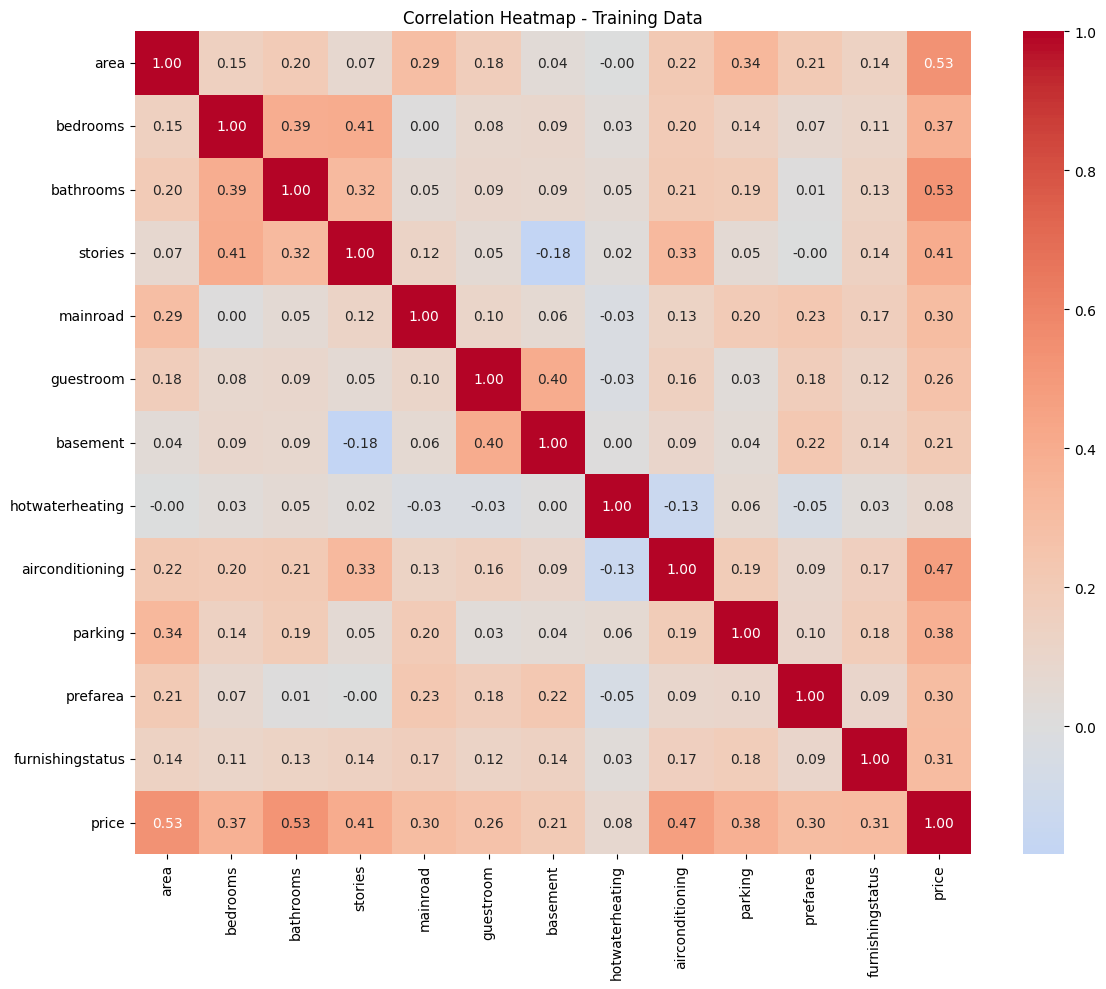

Top correlations with price:
price               1.000000
area                0.533820
bathrooms           0.532511
airconditioning     0.470574
stories             0.405019
parking             0.378698
bedrooms            0.371415
furnishingstatus    0.307402
mainroad            0.303753
prefarea            0.299966
guestroom           0.264367
basement            0.206661
hotwaterheating     0.075273
Name: price, dtype: float64


In [12]:
# Plot results
plt.figure(figsize=(12, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Training Data')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Correclation matrix
correlation_matrix.to_csv('correlation_matrix.csv')
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("Top correlations with price:")
print(price_correlations)

In [13]:
# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Use score method (returns R²)
train_score = lr_model.score(X_train_scaled, y_train)
test_score = lr_model.score(X_test_scaled, y_test)

print(f"Training R² score: {train_score:.4f}")
print(f"Test R² score: {test_score:.4f}")

Training R² score: 0.6854
Test R² score: 0.6495


In [14]:
# Generate predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Create DataFrames with predictions
train_predictions_df = pd.DataFrame({
    'actual_price': y_train,
    'predicted_price': y_train_pred,
    'residual': y_train - y_train_pred
})

test_predictions_df = pd.DataFrame({
    'actual_price': y_test,
    'predicted_price': y_test_pred,
    'residual': y_test - y_test_pred
})

# Save predictions
train_predictions_df.to_csv('train_predictions.csv', index=False)
test_predictions_df.to_csv('test_predictions.csv', index=False)

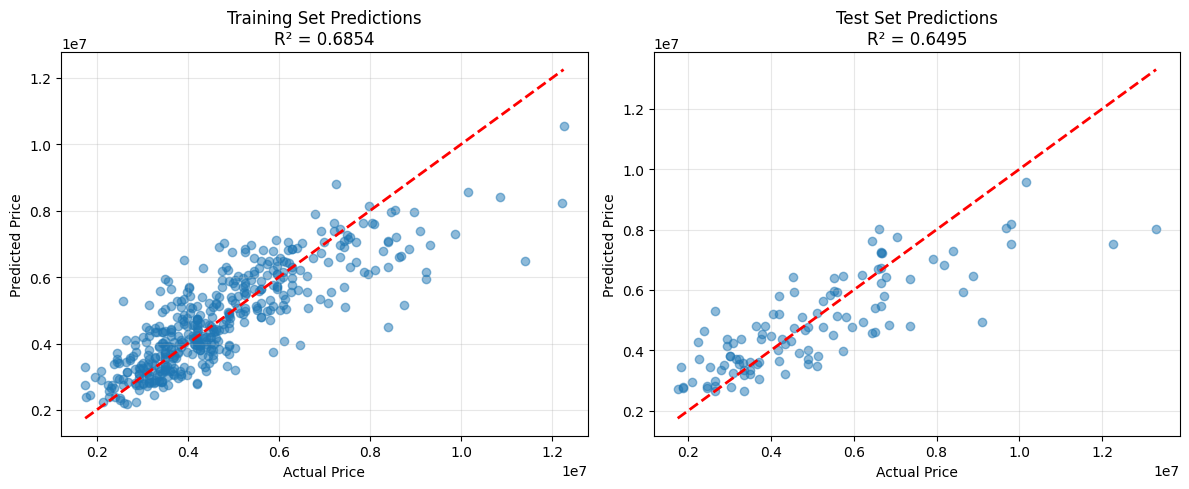

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(train_predictions_df['actual_price'], train_predictions_df['predicted_price'], alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Training Set Predictions\nR² = {train_score:.4f}')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(test_predictions_df['actual_price'], test_predictions_df['predicted_price'], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Test Set Predictions\nR² = {test_score:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('predictions_plot.png', dpi=300, bbox_inches='tight')
plt.show()